In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
numTeste = "2"
#tipoTeste = "sw"
tipoTeste = "parimpar"
df = pd.read_table("../Saidas/Teste"+numTeste+"/info_"+tipoTeste+".txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
#df.reset_index().set_index('index', drop=False)
#df.drop(df[df.Tempo > 80].index, inplace=True)
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,RegrasBloqueadas,BytesEnviados,Medicao
0,17,SW,17,52,0,8441679,1
1,17,HW,10,24,0,6799464,2
2,27,SW,27,92,0,49811511,2
3,27,HW,25,90,0,43215984,3
4,37,SW,42,135,0,148402983,3
5,37,HW,39,127,0,125595792,4
6,47,SW,53,161,0,293190774,4
7,47,HW,39,160,0,251041896,5
8,57,SW,46,193,0,465217062,5
9,57,HW,46,192,0,436208976,6


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

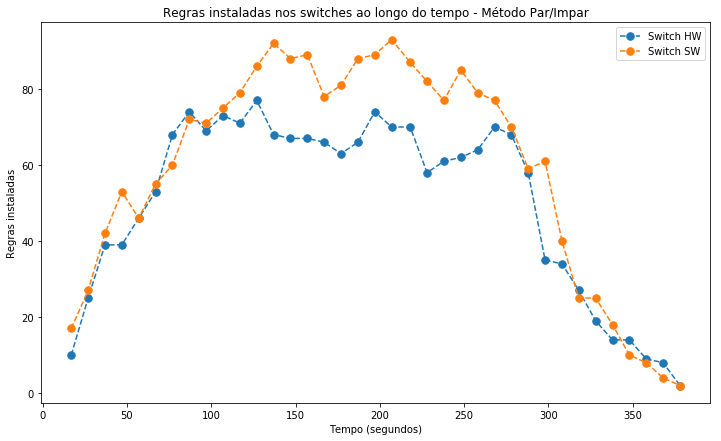

In [5]:
#Agrupando por switch
groups = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")

# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.RegrasInstaladas, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
if(tipoTeste == "parimpar"):
    plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Par/Impar") #u = unicode
else:
    plt.title(u"Regras instaladas nos switches ao longo do tempo - Método SW/HW")
ax.legend()
plt.savefig('regrasInstaladas_Tempo_'+tipoTeste+'_teste'+numTeste+'.pdf')
plt.show()